In [46]:
import numpy as np
import os
path = './log/'
!ls $path

20210407_2318.log  20210412_0103.log  20210413_0346.log  20210414_0103.log
20210412_0102.log  20210413_0343.log  20210413_0545.log  20210414_0105.log


In [57]:
import matplotlib.pyplot as plt
import matplotlib
def smooth(y, radius=10, mode='two_sided'):
    if len(y) < 2*radius+1:
        return np.ones_like(y) * y.mean()
    elif mode == 'two_sided':
        convkernel = np.ones(2 * radius+1)
        return np.convolve(y, convkernel, mode='same') / \
               np.convolve(np.ones_like(y), convkernel, mode='same')
    elif mode == 'causal':
        convkernel = np.ones(radius)
        out = np.convolve(y, convkernel,mode='full') / \
              np.convolve(np.ones_like(y), convkernel, mode='full')
        return out[:-radius+1]

def plot(content):
    avg_len_l = []
    avg_r_l = []
    for i, x in enumerate(content):
        if i < 32:
            print(x[:-1])  # remove the last '\n'
        if 'Frame:' in x:
            try:
                avg_len = float(x.split('Avg. Length:')[-1])
            except:
                avg_len = 0
            avg_len_l.append(avg_len)
            avg_r = float(x.split('Avg. Reward:')[-1].split(',')[0])
            avg_r_l.append(avg_r)

    fig, axs = plt.subplots(2)
    axs[0].plot(smooth(avg_r_l, radius=10))
    axs[1].plot(smooth(avg_len_l, radius=10))
    print(len(avg_len_l))


                          Options
                          seed: 1122
                          batch_size: 32
                          no_cuda: False
                          max_frames: 10000000
                          buffer_size: 100000
                          update_target: 1000
                          train_freq: 1
                          gamma: 0.99
                          eta: 0.1
                          rl_start: 10000
                          sl_start: 1000
                          hidden_dim: 256
                          dueling: False
                          multi_step: 1
                          env: SlimeVolley-v0
                          negative: False
                          load_model: None
                          save_model: model
                          evaluate: False
                          render: False
                          evaluation_interval: 10000
                          lr: 0.0001
                          max_tag_interval

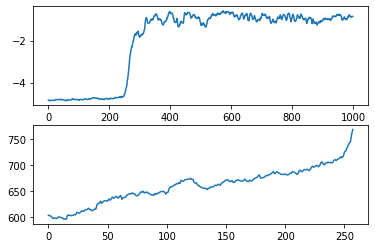

In [58]:
filename = '20210414_0105.log'

f = open(os.path.join(path, filename), "r")
content = f.readlines()

plot(content)


                          Options
                          seed: 1122
                          batch_size: 32
                          no_cuda: False
                          max_frames: 30000000
                          buffer_size: 100000
                          update_target: 1000
                          train_freq: 1
                          gamma: 0.99
                          eta: 0.1
                          rl_start: 10000
                          sl_start: 1000
                          hidden_dim: 512
                          dueling: False
                          multi_step: 1
                          env: SlimeVolleyNoFrameskip-v0
                          negative: False
                          load_model: None
                          save_model: model
                          evaluate: False
                          render: False
                          evaluation_interval: 10000
                          lr: 0.0001
                          max_t

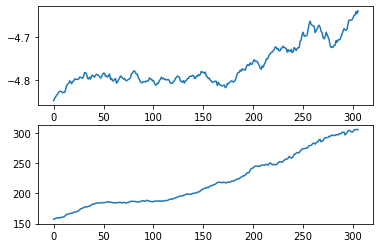

In [60]:
filename = '20210414_0103.log'

f = open(os.path.join(path, filename), "r")
content = f.readlines()

plot(content)


In [112]:
a=[[1],[2]]
c=[3,4]
b=[]
b.extend([*zip(a,c)])
b.extend([*zip(a,c)])
print(b)

[([1], 3), ([2], 4), ([1], 3), ([2], 4)]
